# SDWFS AGN Purity Curves Plot
## Author: Benjamin Floyd

Generates a publication plot of how the AGN purities change as a function of color across multiple redshift bins.

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline
# plt.style.use('tableau-colorblind10')
plt.rcParams.update({'font.size': 14})

In [2]:
# Read in the file with stored curve data
with open('Data_Repository/Project_Data/SPT-IRAGN/SDWFS_background/SDWFS_purity_color_4.5_17.48.json', 'r') as f:
    purity_data = json.load(f)
z_bins = purity_data['redshift_bins']
color_bins = purity_data['color_bins']
purity_ratios = np.asarray(purity_data['purity_ratios'])

In [3]:
# Rebuild interpolation
purity_interp = interp1d(color_bins[:-1], purity_ratios, kind='linear', axis=1)

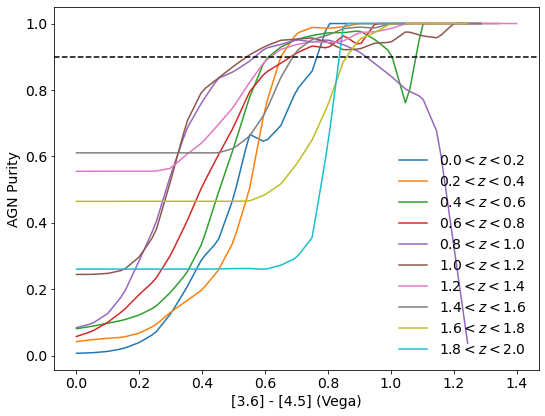

In [4]:
# Make plot
color_range = np.linspace(color_bins[0], color_bins[-2], num=100)
fig, ax = plt.subplots(figsize=(7.8, 6))
for i, z in enumerate(z_bins[:-1]):
    # ax.step(color_bins[:-1], contamination_ratios[i, :], label=fr'${z:.1f} < z < {z_bins[i+1]:.1f}$')
    ax.plot(color_range, purity_interp(color_range)[i], label=fr'${z:.1f} < z < {z_bins[i+1]:.1f}$')
ax.axhline(0.9, ls='--', c='k')
# ax.axhline(0.95, ls=':', c='k')
ax.legend(frameon=False)
ax.set(xlabel='[3.6] - [4.5] (Vega)', ylabel='AGN Purity')
fig.tight_layout()
fig.savefig('Data_Repository/Project_Data/SPT-IRAGN/Publication_Plots/SDWFS_AGN_purity_curves_publication.pdf')